<h1> Markus Kattner - Beispiel SQLITE Datenimport mit Python </h1> 

![image.png](attachment:3ee933a0-883e-4397-b170-267bd222297d.png)

<style>
table, th, td, tr {
  border: 3px solid black;
}
</style>
 
<table><tr><td align="center"> <strong>Wesentliche Themen </strong></td><td align = "center"><strong>Das sollte ich wissen...</strong></td><td align = "center"><strong>Das sollte ich können...</strong></td></tr>
<tr>
    <td>
        <ul>
            <li> Datenimport und Bereinigung </li>
            <li> Text-Codierung (ANSI vs. UTF8) </li>
            <li> SQLITE mit Python </li>
            <li> Datentypen in SQLITE und einfache relationale Abfragen </li>
        </ul>
    </td>
    <td>
        <ul>
            <li> Was ist ein "flat file" und welche Varianten sind dir bekannt ? </li>
            <li> Was ist der Unterschied zwischen ANSI und UTF8?</li>
            <li> Welche Phasen werden im Data Science Prozess unterschieden? Ordne die Aufgabenstellung des
            Datenimports ein.</li>
            <li> Welche Eigenschaften weist SQLITE im Vergleich zu anderen Datenbanken auf?</li>
        </ul>
    </td> 
    <td>
        <ul>
            <li> Abschätzen und Begründen für welchen Einsatzzweck eine SQLITE DB geeignet ist.</li>
            <li> Entwicklung/ Erläuterung einer geeigneten Datenimport - Prozedur für unterschiedliche Ausgangssituationen.</li>
            <li> Ableitung einer relationalen Abfrage zur Erzeugung "aussagekräftiger" Analyseergebnisse.</li>
        </ul>
    </td>
     
    
    
</tr>

https://www.sqlite.org/whentouse.html
http://staud.info/

## Aufgabenstellung: Ausführung von SQL statements und Datenausgabe: pd.read_sql vs cur.execute
1. führe die folgenden Beispiele aus und ersetze alle Screenshots durch eigene
2. erkläre und vergleiche die Verwendung von cursor vs. pd.read_sql in deinem Notebook
3. generiere (mind. zwei) eigene, aussagekräftige SQL - statements bzw. Kunden-/ Bestellauswertungen
4. Erstelle eine grafische Darstellung für deine eigene Auswertung. Verwende dazu nicht die seaborn library, sondern 
  eine geeignete Alternative

----------------------------
----------------------------
# A) BASISVARIANTE IMPORT VON FLATFILE "KUNDEN"
<html>
<head>
    <title> Import "Kunden" .txt file</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
</head>
<body>
    <p><i class="fa fa-id-card" style="font-size:48px;color:lightgrey"> </i> </p>
    </body>
</html> 

In [10]:
#!pip install pandas
import pandas as pd
# r steht für raw - string. Ist wichtig, damit beim Import die Backshots funktionieren.
markus_df=pd.read_csv(r"C:\Users\Markus\OneDrive\Informatik\Kunden.txt",sep=";" )
# df steht für DATA FRAME, zweidimensionales Datenformat
markus_df.head(3)
# zeigt die ersten 5 Zelein das dataframe; Die Funktion nimmt einen beliebigen Integer als Argument.


,ID,Firma,Nachname,Vorname,E-Mail-Adresse,Position,Telefon (geschäftlich),Telefon privat,Mobiltelefon,Faxnummer,Straße,Ort,Bundesland/Kanton,PLZ,Land/Region,Webseite,Bemerkungen,Anlagen
0,1,Firma A,Bedecs,Anna,NaN,Inhaberin,(123)555-0100,NaN,NaN,(123)555-0101,123 1st Street,Seattle,WA,99999,USA,NaN,NaN,NaN
1,2,Firma B,Gratacos Solsona,Antonio,NaN,Inhaber,(123)555-0100,NaN,NaN,(123)555-0101,123 2nd Street,Boston,MA,99999,USA,NaN,NaN,NaN
2,3,Firma C,Axen,Thomas,NaN,Einkaufsmitarbeiter,(123)555-0100,NaN,NaN,(123)555-0101,123 3rd Street,Los Angeles,CA,99999,USA,NaN,NaN,NaN


In [11]:
#get optional parameters for imported dataset
print(markus_df.columns)
print(markus_df.shape)
print(markus_df.size)


Index(['ID', 'Firma', 'Nachname', 'Vorname', 'E-Mail-Adresse', 'Position',
       'Telefon (geschäftlich)', 'Telefon privat', 'Mobiltelefon', 'Faxnummer',
       'Straße', 'Ort', 'Bundesland/Kanton', 'PLZ', 'Land/Region', 'Webseite',
       'Bemerkungen', 'Anlagen'],
      dtype='object')
(29, 18)
522


In [12]:
#!pip install sqlite3
import sqlite3

#cnx = sqlite3.connect(':memory:') alternative in memory database
sqlite_db = r"C:\Users\Markus\OneDrive\Informatik\northwind.db" # String for creating DB in specified directory
print(sqlite_db)

C:\Users\Markus\OneDrive\Informatik\northwind.db


In [13]:
conn=sqlite3.connect(sqlite_db) # Creates sqlite Database - check in your file explorer
cur=conn.cursor()
cur.execute('''DROP TABLE IF EXISTS Kunden''')


In [14]:
markus_df.to_sql('Kunden_jupyter', conn, if_exists='replace', index=False) # writes the pd dataframe to SQLITE Database
# Alternative 1: add primary key with dtype
# Alternative 2: Create Table first and then append data

29

# Ergebnis der Datenimports auf der lokalen Maschine 127.0.0.1 (DB Browser for sqlite)
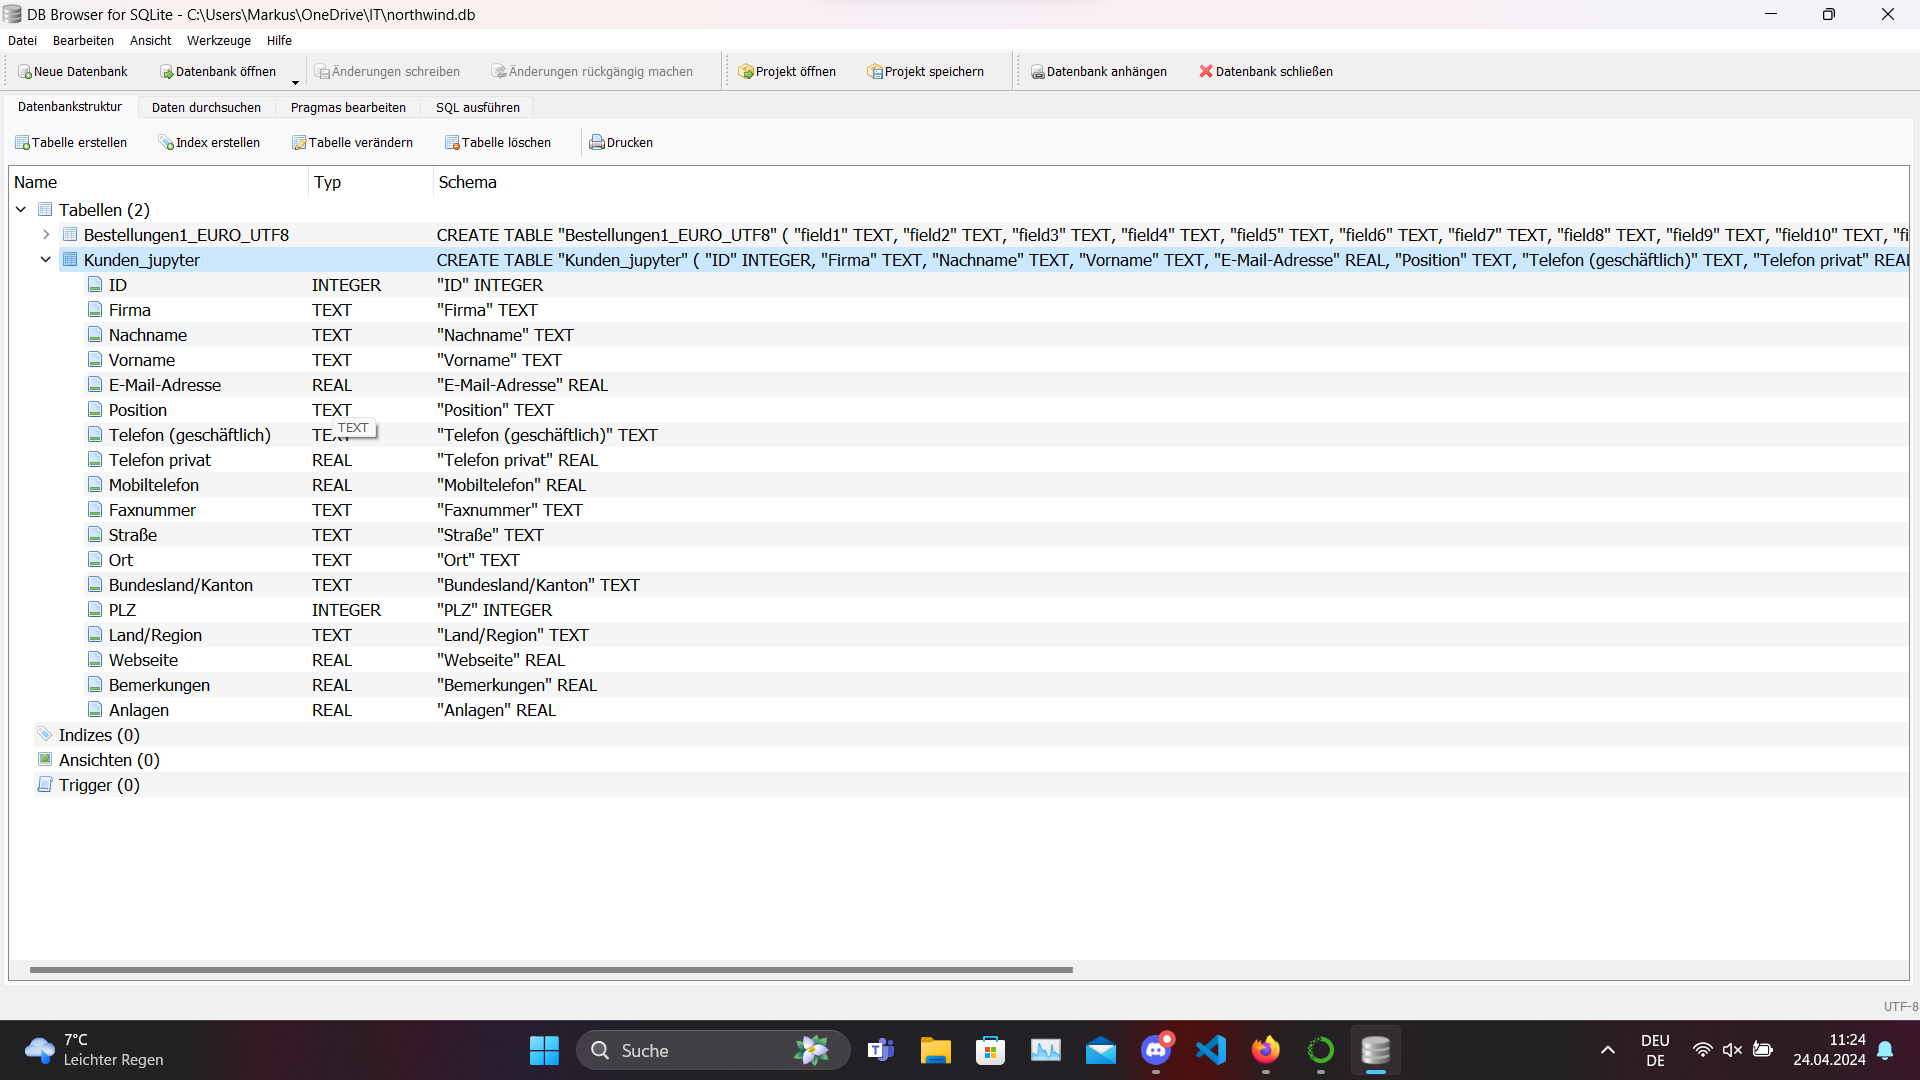

In [15]:
pd.read_sql('SELECT * FROM Kunden_jupyter WHERE ID < 4', conn)


,ID,Firma,Nachname,Vorname,E-Mail-Adresse,Position,Telefon (geschäftlich),Telefon privat,Mobiltelefon,Faxnummer,Straße,Ort,Bundesland/Kanton,PLZ,Land/Region,Webseite,Bemerkungen,Anlagen
0,1,Firma A,Bedecs,Anna,None,Inhaberin,(123)555-0100,None,None,(123)555-0101,123 1st Street,Seattle,WA,99999,USA,None,None,None
1,2,Firma B,Gratacos Solsona,Antonio,None,Inhaber,(123)555-0100,None,None,(123)555-0101,123 2nd Street,Boston,MA,99999,USA,None,None,None
2,3,Firma C,Axen,Thomas,None,Einkaufsmitarbeiter,(123)555-0100,None,None,(123)555-0101,123 3rd Street,Los Angeles,CA,99999,USA,None,None,None


In [16]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('Bestellungen1_EURO_UTF8',), ('Kunden_jupyter1',), ('Bestellungen1',), ('Kunden_jupyter',)]


In [17]:
cur.execute("SELECT ID, Nachname FROM Kunden_jupyter;")
print(cur.fetchall())

[(1, 'Bedecs'), (2, 'Gratacos Solsona'), (3, 'Axen'), (4, 'Lee'), (5, 'O’Donnell'), (6, 'Pérez-Olaeta'), (7, 'Xie'), (8, 'Andersen'), (9, 'Mortensen'), (10, 'Wacker'), (11, 'Krschne'), (12, 'Edwards'), (13, 'Ludick'), (14, 'Grilo'), (15, 'Kupkova'), (16, 'Goldschmidt'), (17, 'Bagel'), (18, 'Autier Miconi'), (19, 'Eggerer'), (20, 'Li'), (21, 'Tham'), (22, 'Ramos'), (23, 'Entin'), (24, 'Hasselberg'), (25, 'Rodman'), (26, 'Liu'), (27, 'Toh'), (28, 'Raghav'), (29, 'Lee')]


In [18]:
query_result = cur.fetchall()
type(query_result)

list

In [19]:
pd.read_sql("SELECT ID, Nachname FROM Kunden_jupyter WHERE ID < 5;", conn)

,ID,Nachname
0,1,Bedecs
1,2,Gratacos Solsona
2,3,Axen
3,4,Lee


In [20]:
# Close connection to database upon completion
conn.commit()
conn.close()

------------
------------
# B) ERWEITERTER IMPORT: TABLE "Kunden"
- Berücksichtigung des Primärschlüssels
- Hinzufügen der Datentypen

<html>
<head>
    <title> Import "Kunden" .txt flatfile</title>
<meta name="viewport" content="width=device-width, initial-scale=1">
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
</head>
<body>
    <p><i class="fa fa-id-card" style="font-size:48px;color:gold"> </i> </p>
    </body>
</html> 

In [21]:
# Alternative 1, TABLE "KUNDEN": add primary key with dtype
import pandas as pd
import sqlite3

markus_df1=pd.read_csv(r"C:\Users\Markus\OneDrive\Informatik\Kunden.txt",sep=";" )

#drop NAN Columns (keine Daten vorhanden)
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna
markus_df1.dropna(axis=1,how='all',inplace=True)
# der Parameter "all" bedeutet, dass nur Spaltern gelöscht werden, die komplett mit NULL - Werten befüllt sind. Sobald ein NOT Null enthalten ist, 
#wird die Spalte nicht gelöscht. ALTERNATIVE : "any" 
markus_df1.head()




,ID,Firma,Nachname,Vorname,Position,Telefon (geschäftlich),Faxnummer,Straße,Ort,Bundesland/Kanton,PLZ,Land/Region
0,1,Firma A,Bedecs,Anna,Inhaberin,(123)555-0100,(123)555-0101,123 1st Street,Seattle,WA,99999,USA
1,2,Firma B,Gratacos Solsona,Antonio,Inhaber,(123)555-0100,(123)555-0101,123 2nd Street,Boston,MA,99999,USA
2,3,Firma C,Axen,Thomas,Einkaufsmitarbeiter,(123)555-0100,(123)555-0101,123 3rd Street,Los Angeles,CA,99999,USA
3,4,Firma D,Lee,Christina,Einkaufsmanagerin,(123)555-0100,(123)555-0101,123 4th Street,New York,NY,99999,USA
4,5,Firma E,O’Donnell,Martin,Inhaber,(123)555-0100,(123)555-0101,123 5th Street,Minneapolis,MN,99999,USA


In [22]:
sqlite_db1 = r"C:\Users\Markus\OneDrive\Informatik\northwind.db" # String for creating DB in specified directory

conn1=sqlite3.connect(sqlite_db1) # Creates sqlite Database - check in your file explorer
cur1=conn1.cursor()
cur1.execute('''DROP TABLE IF EXISTS Kunden_jupyter1''')
markus_df1.to_sql('Kunden_jupyter1', conn1, if_exists='replace', index=False,dtype={'ID':'INTEGER PRIMARY KEY', 'Firma':'TEXT', 'Nachname':'TEXT', 'Vorname':'TEXT', 'Position':'TEXT',
       'Telefon (geschäftlich)':'TEXT', 'Faxnummer':'TEXT',
       'Straße':'TEXT', 'Ort':'TEXT', 'Bundesland/Kanton':'TEXT', 'PLZ':'TEXT', 'Land/Region':'TEXT'}) # writes the pd dataframe to SQLITE Database
#dtypedict or scalar, optional
#Specifying the datatype for columns. If a dictionary is used, the keys should be the column names and the values should be the SQLAlchemy types or strings for the sqlite3 legacy mode. If a scalar is provided, it will be applied to all columns.

29

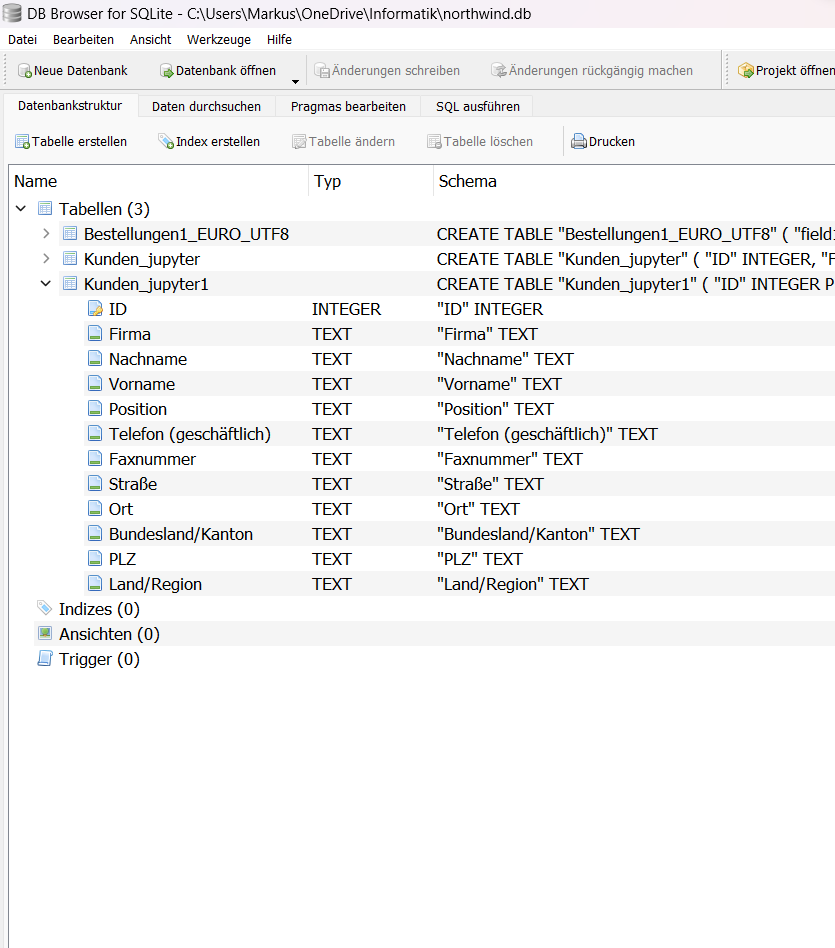

In [23]:
pd.read_sql("SELECT * FROM Kunden_jupyter1 WHERE ID <=5;", conn1)

,ID,Firma,Nachname,Vorname,Position,Telefon (geschäftlich),Faxnummer,Straße,Ort,Bundesland/Kanton,PLZ,Land/Region
0,1,Firma A,Bedecs,Anna,Inhaberin,(123)555-0100,(123)555-0101,123 1st Street,Seattle,WA,99999,USA
1,2,Firma B,Gratacos Solsona,Antonio,Inhaber,(123)555-0100,(123)555-0101,123 2nd Street,Boston,MA,99999,USA
2,3,Firma C,Axen,Thomas,Einkaufsmitarbeiter,(123)555-0100,(123)555-0101,123 3rd Street,Los Angeles,CA,99999,USA
3,4,Firma D,Lee,Christina,Einkaufsmanagerin,(123)555-0100,(123)555-0101,123 4th Street,New York,NY,99999,USA
4,5,Firma E,O’Donnell,Martin,Inhaber,(123)555-0100,(123)555-0101,123 5th Street,Minneapolis,MN,99999,USA


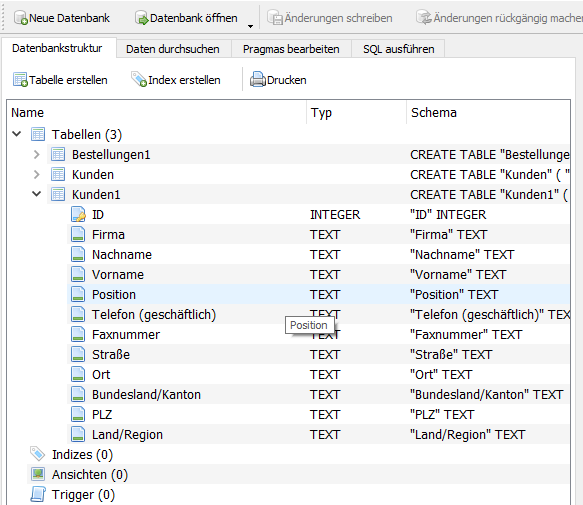


---------
----------
# C) IMPORT TABLE "Bestellungen"
<html>
<head>
<title>Import des "Bestellungen" .txt file </title>
<meta name="viewport" content="width=device-width, initial-scale=1">
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
</head>
<body>
    <p><i class="fa fa-shipping-fast" style="font-size:48px;color:gold"> </i> </p>
    <p><i class="fa fa-exclamation" style="font-size:48px;color:red"> </i> <strong>TAKE CARE OF POSSIBLE UNICODE ERRORS (replace EURO or save with UTF8 encoding)</strong></p>
    </body>
</html> 


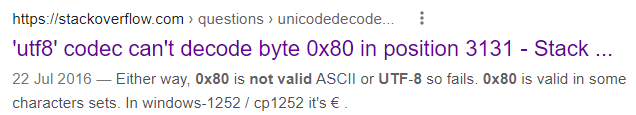


In [24]:
# Alternative 1, TABLE "KUNDEN": add primary key with dtype
import pandas as pd
import sqlite3

markus_df2=pd.read_csv(r"C:\Users\Markus\OneDrive\Informatik\Bestellungen1_EURO_UTF8.txt",sep=";" )
markus_df2.dropna(axis=1,how='all',inplace=True)
# Index 0 = Zeile, Index 1= Spalte, NULL oder NAN bedeutet in der DB, dass KEIN WERT
# existiert. Es handelt sich nicht um die Zahl 0

markus_df2.head()

,Bestell-Nr,Personal-Nr,Kunden-Code,Bestelldatum,Versanddatum,Versandfirmen-Nr,Liefername,Lieferadresse,Lieferort,Bundesland,PLZ,Bestimmungsland/-region,Versandkosten,Steuern,Zahlungsart,Zahlungsdatum,Steuersatz,Status-Nr
0,30,9,27,15.1.2006 00:00:00,22.1.2006 00:00:00,2.0,Karen Toh,789 27th Street,Las Vegas,NV,99999,USA,"EURO 200,00","EURO 0,00",Scheck,15.1.2006 00:00:00,"0,00",3
1,31,3,4,20.1.2006 00:00:00,22.1.2006 00:00:00,1.0,Christina Lee,123 4th Street,New York,NY,99999,USA,"EURO 5,00","EURO 0,00",Kreditkarte,20.1.2006 00:00:00,"0,00",3
2,32,4,12,22.1.2006 00:00:00,22.1.2006 00:00:00,2.0,John Edwards,123 12th Street,Las Vegas,NV,99999,USA,"EURO 5,00","EURO 0,00",Kreditkarte,22.1.2006 00:00:00,"0,00",3
3,33,6,8,30.1.2006 00:00:00,31.1.2006 00:00:00,3.0,Elizabeth Andersen,123 8th Street,Portland,OR,99999,USA,"EURO 50,00","EURO 0,00",Kreditkarte,30.1.2006 00:00:00,"0,00",3
4,34,9,4,6.2.2006 00:00:00,7.2.2006 00:00:00,3.0,Christina Lee,123 4th Street,New York,NY,99999,USA,"EURO 4,00","EURO 0,00",Scheck,6.2.2006 00:00:00,"0,00",3


In [25]:
markus_df2=markus_df2.drop(['Steuersatz','Steuern'], axis=1)
#das inplace=True Argument wird hier nicht mitgegeben, deshalb muss der 
# dataframe mit sich selbst überschrieben werden...
#axis: welche Dimension wird gelöscht? Zeilen oder Spalten..
# 0 Zeile, 1 Spalte

In [26]:
#formatting EURO amounts and dates
# try out with a single data point first
temp_string=markus_df2.Versandkosten[1][4:].strip()
# [1:] bedeutet wir schneiden das Euro - Zeichen aus dem String weg, strip() löscht
# die blanks/ Leerzeichen...
print(temp_string)
print(type(temp_string))
temp_string=float(temp_string.replace(',','.'))
#hier wird "typecasting" durchgeführt. D.H. die String - Variable wird in eine Zahl(Float) 
# umgewandelt...
print(temp_string)
print(type(temp_string))

5,00
<class 'str'>
5.0
<class 'float'>


In [27]:
import time, datetime
# FORTSETZUNG 11. März

In [28]:
# strtime und Erklärung der Funktionsweise

#Test strptime instead of manual formatting
#https://docs.python.org/3/library/time.html#time.strftime
stime = "15/05/2024"
print("Testergebnis für strptime auf: 15 05 2024",datetime.datetime.strptime(stime,"%d/%m/%Y"))

print(markus_df2['Bestelldatum'][0])
mydate=datetime.datetime.strptime(markus_df2['Bestelldatum'][0],"%d.%m.%Y %H:%M:%S")
print(mydate)

print(mydate.timetuple())
time.mktime(mydate.timetuple())


Testergebnis für strptime auf: 01 12 2011 2021-12-01 00:00:00
15.1.2006 00:00:00
2006-01-15 00:00:00
time.struct_time(tm_year=2006, tm_mon=1, tm_mday=15, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=15, tm_isdst=-1)


1137279600.0

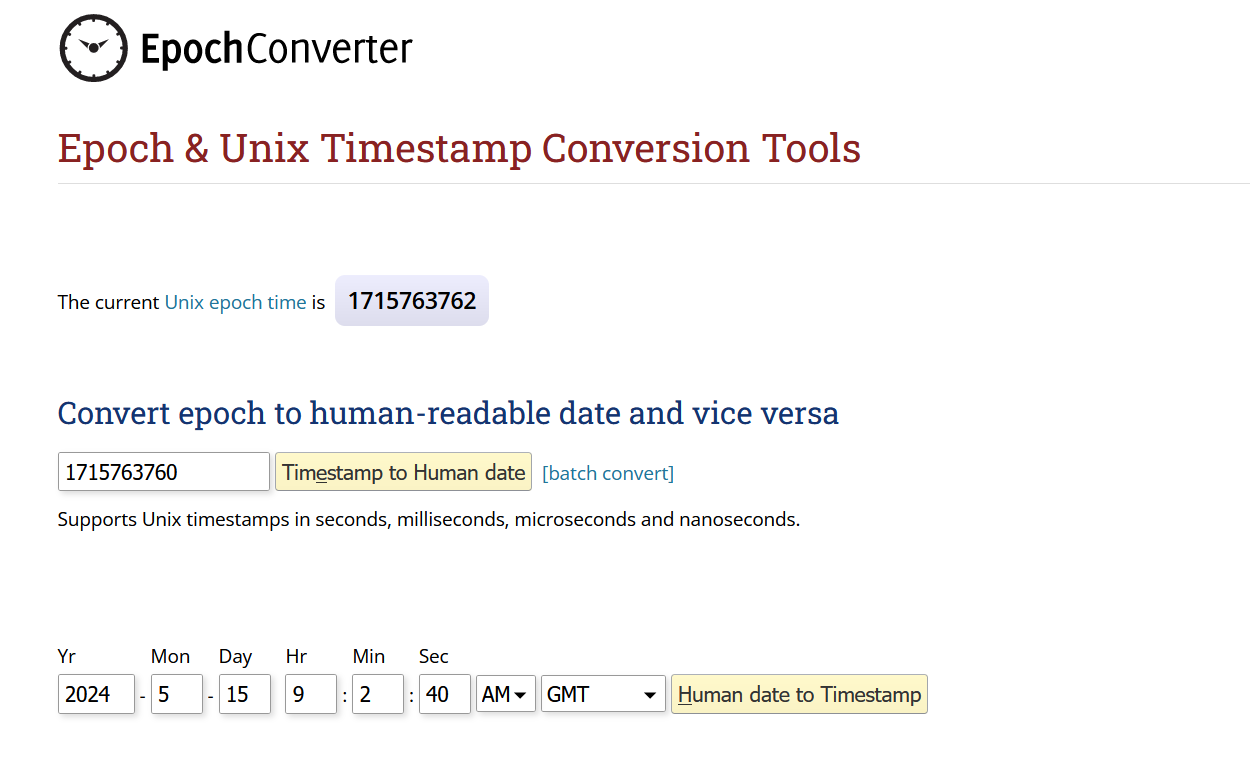

In [29]:
def create_unix_time(input_datetime):
    try:
        output_datetime=time.mktime(datetime.datetime.strptime(input_datetime,"%d.%m.%Y %H:%M:%S").timetuple())
    except:
        output_datetime=float("NAN")
    return output_datetime

iterrows gibt immer die akuelle Zeile zurück (row)
Gleichzeitig wird der aktuelle Index der Zeile zurückgegeben. 
Der Index wird benötigt, um den jeweiligen Datumswert im DataFrame zu überschreiben...



In [30]:
for i, row in markus_df2.iterrows():
    markus_df2.at[i, 'Bestelldatum'] = create_unix_time(row['Bestelldatum'])
    markus_df2.at[i, 'Versanddatum'] = create_unix_time(row['Versanddatum'])
    markus_df2.at[i, 'Zahlungsdatum'] = create_unix_time(row['Zahlungsdatum'])
    markus_df2.at[i, 'Versandkosten'] = float(row['Versandkosten'][5:].strip().replace(',','.'))
    


In [31]:
markus_df2.head()

,Bestell-Nr,Personal-Nr,Kunden-Code,Bestelldatum,Versanddatum,Versandfirmen-Nr,Liefername,Lieferadresse,Lieferort,Bundesland,PLZ,Bestimmungsland/-region,Versandkosten,Zahlungsart,Zahlungsdatum,Status-Nr
0,30,9,27,1137279600.0,1137884400.0,2.0,Karen Toh,789 27th Street,Las Vegas,NV,99999,USA,200.0,Scheck,1137279600.0,3
1,31,3,4,1137711600.0,1137884400.0,1.0,Christina Lee,123 4th Street,New York,NY,99999,USA,5.0,Kreditkarte,1137711600.0,3
2,32,4,12,1137884400.0,1137884400.0,2.0,John Edwards,123 12th Street,Las Vegas,NV,99999,USA,5.0,Kreditkarte,1137884400.0,3
3,33,6,8,1138575600.0,1138662000.0,3.0,Elizabeth Andersen,123 8th Street,Portland,OR,99999,USA,50.0,Kreditkarte,1138575600.0,3
4,34,9,4,1139180400.0,1139266800.0,3.0,Christina Lee,123 4th Street,New York,NY,99999,USA,4.0,Scheck,1139180400.0,3


## Handling von Date-Time in SQLITE
In SQLite ist keine Speicherklasse zum Speichern von Datum und / oder Uhrzeit reserviert. Stattdessen können die integrierten Datums- und Zeitfunktionen von SQLite Datums- und Uhrzeitangaben als TEXT-, REAL- oder INTEGER-Werte speichern:

- TEXT als ISO8601-Zeichenfolgen ("JJJJ-MM-TT HH: MM: SS.SSS").
- REAL als julianische Tageszahlen, die Anzahl der Tage seit Mittag in Greenwich am 24. November 4714 v. Chr. Nach dem proleptischen gregorianischen Kalender.
- INTEGER als Unix-Zeit, die Anzahl der Sekunden seit 1970-01-01 00:00:00 UTC.
Anwendungen können Datums- und Uhrzeitangaben in einem dieser Formate speichern und mithilfe der integrierten Datums- und Uhrzeitfunktionen frei zwischen Formaten konvertieren.

Die in SQLite integrierten Datums- und Uhrzeitfunktionen finden Sie hier .
http://www.sqlite.org/lang_datefunc.html

In [32]:
markus_df2.dtypes

Bestell-Nr                   int64
Personal-Nr                  int64
Kunden-Code                  int64
Bestelldatum                object
Versanddatum                object
Versandfirmen-Nr           float64
Liefername                  object
Lieferadresse               object
Lieferort                   object
Bundesland                  object
PLZ                          int64
Bestimmungsland/-region     object
Versandkosten               object
Zahlungsart                 object
Zahlungsdatum               object
Status-Nr                    int64
dtype: object

In [33]:
# Im .txt File wurde aufgrund eines Übersetzungsfehlers der gesamte Bestellwert mit "Versandkosten" übertitelt
markus_df2=markus_df2.rename({'Versandkosten':'Bestellwert'}, axis=1)

In [34]:

sqlite_db2 = r"C:\Users\Markus\OneDrive\Informatik\northwind.db" # String for creating DB in specified directory

conn2=sqlite3.connect(sqlite_db2) # Creates sqlite Database - check in your file explorer
cur2=conn2.cursor()
cur2.execute('''DROP TABLE IF EXISTS Bestellungen1''')
markus_df2.to_sql('Bestellungen1', conn2, if_exists='replace', index=False,dtype={'Bestell-Nr':'INTEGER PRIMARY KEY','Personal-Nr':'INTEGER',"Kunden-Code":'INTEGER',"Bestelldatum":'NUMERIC',"Versanddatum":'NUMERIC',"Versandfirmen-Nr":'NUMERIC',"Liefername":'TEXT',"Lieferadresse":'TEXT',"Lieferort":'TEXT',"Bundesland":'TEXT',"PLZ":'TEXT',"Bestimmungsland/-region":'TEXT',"Bestellwert":'NUMERIC',"Zahlungsart":'TEXT',"Zahlungsdatum":'NUMERIC',"Status-Nr":'NUMERIC'}) 
# writes the pd dataframe to SQLITE Database
#dtypedict or scalar, optional
#Specifying the datatype for columns. If a dictionary is used, the keys should be the column names and the values should be the SQLAlchemy types or strings for the sqlite3 legacy mode. If a scalar is provided, it will be applied to all columns.
#conn2.commit()
#conn2.close()

48

In [35]:
pd.read_sql("SELECT * FROM Bestellungen1 WHERE [Bestell-Nr] < 35 ", conn2)
# ADD BRACKETS WHEN USING DASHES :-)


,Bestell-Nr,Personal-Nr,Kunden-Code,Bestelldatum,Versanddatum,Versandfirmen-Nr,Liefername,Lieferadresse,Lieferort,Bundesland,PLZ,Bestimmungsland/-region,Bestellwert,Zahlungsart,Zahlungsdatum,Status-Nr
0,30,9,27,1137279600,1137884400,2,Karen Toh,789 27th Street,Las Vegas,NV,99999,USA,200,Scheck,1137279600,3
1,31,3,4,1137711600,1137884400,1,Christina Lee,123 4th Street,New York,NY,99999,USA,5,Kreditkarte,1137711600,3
2,32,4,12,1137884400,1137884400,2,John Edwards,123 12th Street,Las Vegas,NV,99999,USA,5,Kreditkarte,1137884400,3
3,33,6,8,1138575600,1138662000,3,Elizabeth Andersen,123 8th Street,Portland,OR,99999,USA,50,Kreditkarte,1138575600,3
4,34,9,4,1139180400,1139266800,3,Christina Lee,123 4th Street,New York,NY,99999,USA,4,Scheck,1139180400,3


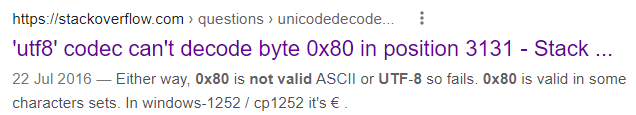
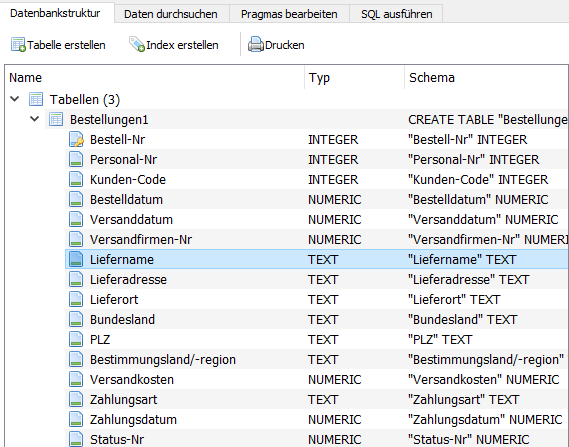



In [36]:
# Alternative 2: Create Table first and then append data

In [45]:
# Selektiere die Kunden nach Umsatz
pd.read_sql("SELECT [Kunden-Code], Nachname, SUM(Bestellwert) AS Umsatz FROM Bestellungen1 JOIN Kunden_jupyter1 ON Kunden_jupyter1.ID=Bestellungen1.[Kunden-Code] GROUP BY [Kunden-Code] ORDER BY Umsatz DESC", conn2)

,Kunden-Code,Nachname,Umsatz
0,6,Pérez-Olaeta,624
1,29,Lee,414
2,27,Toh,400
3,8,Andersen,210
4,9,Mortensen,200
5,26,Liu,120
6,28,Raghav,100
7,10,Wacker,18
8,4,Lee,18
9,3,Axen,14


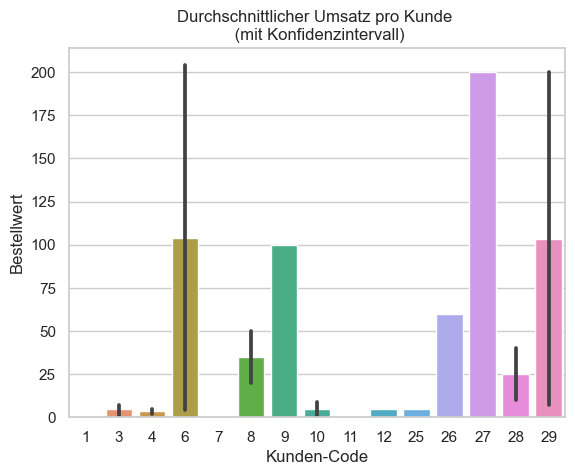

In [46]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Kunden-Code", y="Bestellwert", data=markus_df2).set(title="Durchschnittlicher Umsatz pro Kunde \n (mit Konfidenzintervall)")

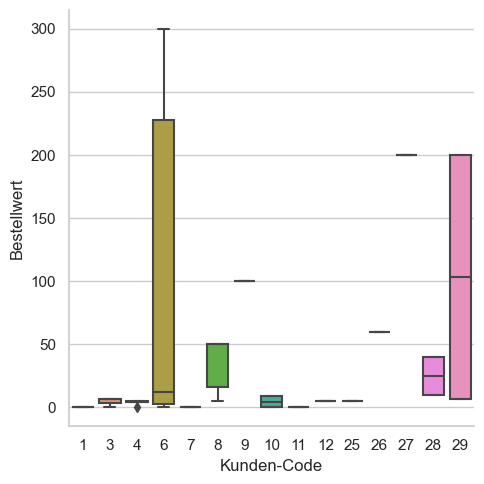

In [48]:
sns.catplot(x="Kunden-Code", y="Bestellwert", kind="box", data=markus_df2).set(title="")

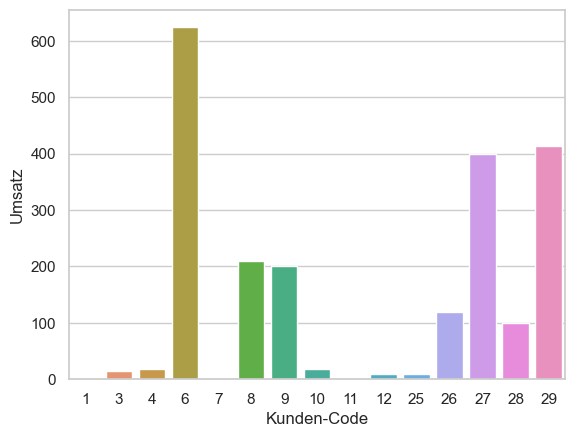

In [51]:
# Selektiere die Kunden nach Umsatz
markus_df3=pd.read_sql("SELECT [Kunden-Code], Nachname, SUM(Bestellwert) AS Umsatz FROM Bestellungen1 JOIN Kunden_jupyter1 ON Kunden_jupyter1.ID=Bestellungen1.[Kunden-Code] GROUP BY [Kunden-Code] ORDER BY Umsatz DESC", conn2)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Kunden-Code", y="Umsatz", data=markus_df3)